In [1]:
import os
os.chdir(r'C:\Users\ashto\DAPPEr')
print(os.getcwd())


C:\Users\ashto\DAPPEr


In [2]:
import numpy as np
from scipy.interpolate import interp1d
import pandas as pd
from src.RockSat_json.RockSat_json import import_data
import matplotlib.pyplot as plt

In [10]:
def VPlasma(V,I, is_UDIP4, avg=1):
    """
    identify plasma potential -> where electron saturation region starts
    This is where the derivative dI/dV is maximized
    """
    d = {"V": V,"I": I}              # keep I and V together in a data frame
    df = pd.DataFrame(data=d)
    Vavg = df['V'].rolling(avg).mean()        # take rolling average voltage

    averages = {"Vavg": Vavg}
    df2 = pd.DataFrame(averages)              # another dataframe for dIdV and average voltage for plotting
    dIdV = pd.Series(np.gradient(df['I'], df['V']))
    df2['dIdV'] = dIdV.rolling(avg).mean()

    if is_UDIP4:                      # if data is from UDIP-4, take upward sweep due to the bad data in first half
        start_idx = (len(df2['dIdV']) // 2)
        dIdV_sub = df2['dIdV'].iloc[start_idx:].reset_index(drop=True)    # ignore first half of dI/dV data
        Vsub = df2['Vavg'].iloc[start_idx:].reset_index(drop=True)
        Vpidx = np.argmax(dIdV_sub)
        Vp = Vsub[Vpidx]                # plasma potential is index where dIdV is maximized
    else:
        Vpidx = np.argmax(df2['dIdV'])
        Vp = df['V'][Vpidx]
    
    return Vp

In [4]:
def VFloat(V, I, is_UDIP4, avg=1):
    """
    Identify floating potential: where I = 0 (crosses zero).
    If is_UDIP4 == True, look only at the upward sweep (second half of data).
    avg controls rolling average window size.
    """
    d = {"V": V,"I": I}              # keep I and V together in a data frame
    df = pd.DataFrame(data=d)
    
    df["Vavg"] = df["V"].rolling(avg).mean()    # Smooth the data 
    df["Iavg"] = df["I"].rolling(avg).mean()

    if is_UDIP4:                      # if data is from UDIP-4, take upward sweep due to the bad data in first half
        start_idx = len(df) // 2
        df = df.iloc[start_idx:].reset_index(drop=True)

    f = interp1d(df["Iavg"], df["Vavg"], kind='linear')  # Interpolate V(I): want V when I=0
    Vf = f(0.0)
    return Vf

Vf= 0.16752199413508262
Vp= 2.7857099217986323


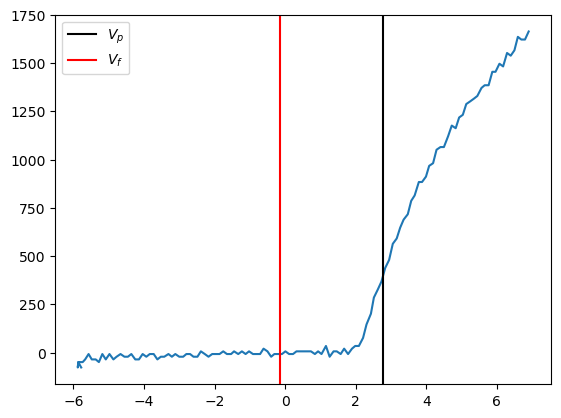

In [61]:
data = r"C:\Users\ashto\DAPPEr\UDIP_4_800s.json"
packets = import_data(data)
I = np.array(packets['packets']['Full']['275']['Current0']) * -1e9
V = np.array(packets['packets']['Full']['275']['Voltage'])
plt.plot(V[(len(I) // 2):],I[(len(I) // 2):])
# print("time:", (packets['packets']['Full']['200']['Start']) / 1000,"s")

print("Vf=",VFloat(V,I, is_UDIP4=True, avg=7))
print("Vp=",VPlasma(V,I,is_UDIP4=True, avg=12))

#plt.plot(V[len(V) // 2:],I[len(V) // 2:])
plt.axvline(VPlasma(V,I, is_UDIP4=True, avg=12), c='black', label='$V_p$')
plt.axvline(VFloat(V,I, is_UDIP4=True, avg=40), c='red', label='$V_f$')

plt.legend()

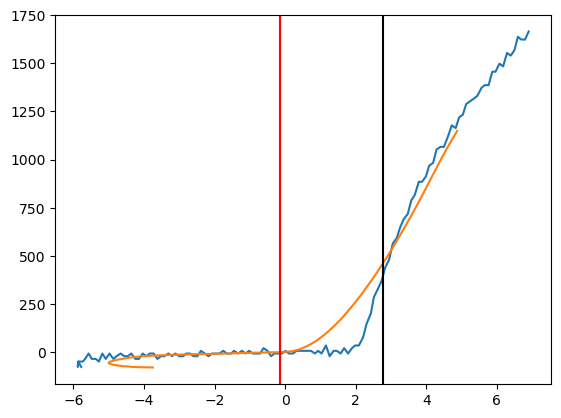

In [63]:
df = pd.DataFrame()
df["I"] = np.array(packets['packets']['Full']['275']['Current0']) * -1e9
df["V"] = np.array(packets['packets']['Full']['275']['Voltage'])

Iavg= df["I"].rolling(40).mean()
Vavg= df['V'].rolling(40).mean()
Iup = Iavg[(len(I) // 2):]
Vup = Vavg[(len(I) // 2):]
plt.plot(V[(len(I) // 2):],I[(len(I) // 2):])
plt.plot(Vup, Iup)
plt.axvline(VPlasma(V,I, is_UDIP4=True, avg=12), c='black', label='$V_p$')
plt.axvline(VFloat(V,I, is_UDIP4=True, avg=40), c='red', label='$V_f$')

Vf= -5.8291788856304985
Vf= -5.802480449657868
Vf= -5.769480519480519
Vf= -5.73341275659824
Vf= -5.761852394916911
Vf= -5.65157624633431
Vf= -5.6088376432951215
Vf= 2.7857099217986323
Vf= 2.838794270245884
Vf= 2.8912599497276927
Vf= 2.9432306940371467
Vf= 2.9961052052785933
Vf= 2.9427936863895128
Vf= 3.1004806125773876
Vf= 3.1521260997067455
Vf= 3.2041788856305
Vf= 3.2559174696271476
Vf= 3.2029125566515613
Vf= 3.359827234476605
Vf= 3.4122525659824063
Vf= 3.464662756598242
Vf= 3.5173274306338835
Vf= 3.569702400347563
Vf= 3.6220674486803524
Vf= 3.674183436141168
Vf= 3.6213709677419366
Vf= 3.6737418408854423
Vf= 3.8310117302052795
Vf= 3.8835643828312456
Vf= 3.8308068828704513
Vf= 3.988018433179725
Vf= 4.040342945584882
Vf= 4.092286201157171
Vf= 4.039589442815251
Vf= 4.196574930445899


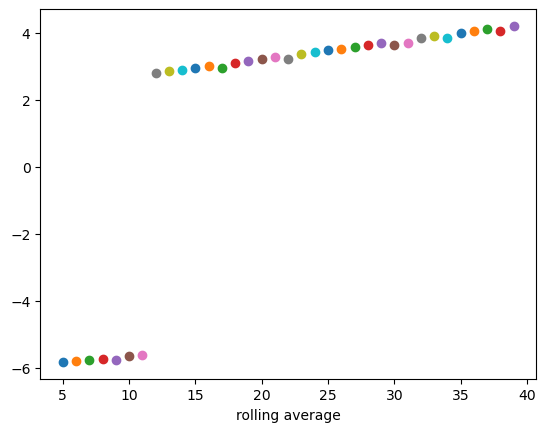

In [57]:
for n in range(5,40):
    print("Vf=",VPlasma(V,I, is_UDIP4=True, avg=n))
    plt.scatter(n,VPlasma(V,I, is_UDIP4=True, avg=n))
    plt.xlabel("rolling average")